<a href="https://colab.research.google.com/github/perfectpanda-works/machine-learning/blob/master/Learning_pytorch_with_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# -*- coding: utf-8 -*-
import numpy as np

# N　　　　　　　　：バッチサイズ
# D_in　　　：入力次元数
# H　　　　　　　　：隠れ層の次元数
# D_out：出力次元数
N, D_in, H, D_out = 64, 1000, 100, 10

# ランダムな入力データと出力データの作成
x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

print(x.shape)
print(y.shape)

(64, 1000)
(64, 10)


In [ ]:
# 重みをランダムに初期化
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

print(w1.shape)
print(w2.shape)

(1000, 100)
(100, 10)


In [ ]:
#損失記録用のリスト
loss_list = []
#学習率 0.000001
learning_rate = 1e-6
for t in range(500):
    #①順伝播（yを予測するフェーズ）
    #重みw1とxの掛け算（行列の掛け算）
    h = x.dot(w1)
    #活性化関数reluを適用
    h_relu = np.maximum(h, 0)
    #中間層の出力にw2の重みを掛け算して予測出力を得る
    y_pred = h_relu.dot(w2)

    #二乗誤差の計算と、誤差の表示
    loss = np.square(y_pred - y).sum()
    print(t, loss)
    loss_list.append(loss)

    #逆伝播：w2とw1の勾配を計算する。
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0
    grad_w1 = x.T.dot(grad_h)

    # 重みの更新(確率的勾配効果法)
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 5.003389800367118e-06
1 4.800880110089442e-06
2 4.606585171499115e-06
3 4.420173470241462e-06
4 4.241319999116078e-06
5 4.0697705050280245e-06
6 3.905145553126385e-06
7 3.7471900712386625e-06
8 3.595678782454953e-06
9 3.450307513707648e-06
10 3.3108062754951824e-06
11 3.1769803209895268e-06
12 3.0485895547097356e-06
13 2.925394533123053e-06
14 2.8071861733736425e-06
15 2.6937701902451525e-06
16 2.584957181592755e-06
17 2.480561929938137e-06
18 2.3803799545056626e-06
19 2.284248137229529e-06
20 2.1920321679978716e-06
21 2.1035431477238775e-06
22 2.018624097836912e-06
23 1.9371504605878613e-06
24 1.858989557560683e-06
25 1.7839709485879222e-06
26 1.7119919675012534e-06
27 1.6429304339001192e-06
28 1.5766652851155764e-06
29 1.5130726845281722e-06
30 1.452054520168295e-06
31 1.393498489845478e-06
32 1.3373251782915713e-06
33 1.2834115993178454e-06
34 1.2316725441923194e-06
35 1.182028329978473e-06
36 1.1344027237342608e-06
37 1.0886871536364306e-06
38 1.0448195940587954e-06
39 1.00272921

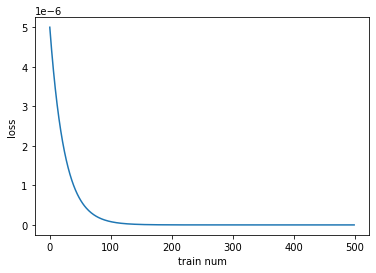

In [ ]:
import matplotlib.pyplot as plt

plt.xlabel("train num")
plt.ylabel("loss")
plt.plot(range(500),loss_list)